In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import re

In [2]:
data=pd.read_csv("f:Spam_Collection.csv",encoding = 'latin-1')

In [3]:
data = data.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
data.columns = ["category", "sms"]

In [4]:
data.columns=['category','sms']

In [5]:
data.head()

,category,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.shape

(5572, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   sms       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


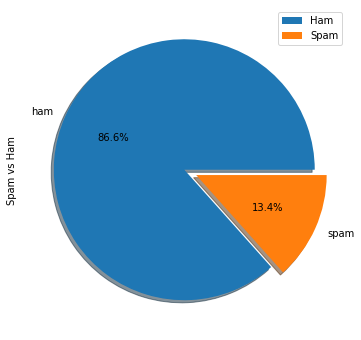

In [8]:
data["category"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [9]:
topMessages = data.groupby("sms")["category"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
sms,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Ok,4,ham
Okie,4,ham
Ok.,4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham


In [12]:
from nltk.tokenize import word_tokenize
spam_data = data[data["category"] == "spam"]["sms"]
ham_data = data[data["category"] == "ham"]["sms"]

spam_words = []
ham_words = []

# Since this is just classifying the message as spam or ham, we can use isalpha(). 
# This will also remove the not word in something like can't etc. 
# In a sentiment analysis setting, its better to use 
# sentence.translate(string.maketrans("", "", ), chars_to_remove)

def extractSpamWords(spamdata):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamdata) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamdata):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamdata) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_data.apply(extractSpamWords)
ham_data.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: sms, Length: 4825, dtype: object

In [26]:
# Top 10 spam words

spam_words = np.array(spam_words)
print("Top 20 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 20)

Top 20 Spam words are :



call       346
free       217
txt        155
u          144
ur         144
mobile     123
text       121
stop       114
claim      113
reply      104
prize       92
get         84
new         69
send        68
nokia       65
cash        62
urgent      62
win         60
contact     56
service     55
dtype: int64

In [46]:
#hamorder_sorted = spam_words.iloc[spam_words['Count'].argsort()]
#spamcommondf = pd.DataFrame(spam_words)
#spamcommondf = spamcommondf.rename(columns={0: "spam"})
#spamcommondf
#spamcommon=spamcommondf.iloc[spamcommondf[''].argsort()]

TypeError: 'DataFrame' object is not callable

In [38]:
#spamcommon.plot.barh(xlim=(0,80), x='spam',figsize=(8,8),title= 'Top 10 Ham Words',fontsize=12)

NameError: name 'spamcommon' is not defined

In [14]:
# Top 10 ham words

ham_words = np.array(ham_words)
print("Top 10 ham words are :\n")
pd.Series(ham_words).value_counts().head(n = 10)

Top 10 ham words are :



u       974
gt      318
lt      316
get     301
go      246
ok      246
got     242
ur      237
know    234
like    231
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data['category']=le.fit_transform(data['category'])

In [ ]:
data.head()

removing special character
lower case
removing stopwords
stemming lemmatization
bag of word model

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import re
for i in data.index:
    temp=re.sub("[^a-z A-Z]",'',data['sms'][i])
    temp=temp.lower()
    temp=temp.split()
    val=[ps.stem(i) for i in temp if not i in stopwords.words('english')]
    val=' '.join(val)
    data['sms'][i]=val

In [ ]:
x=data['sms']
y=data['category']

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizerr
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = cv.fit_transform(data["sms"])

In [ ]:
x=cv.fit_transform(x).toarray()

In [ ]:
pd.DataFrame(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [ ]:
model.fit(xtrain,ytrain)

In [ ]:
ypred=model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

In [ ]:
#tfidf
#it tell the most important word from you data or from your sentence

In [ ]:
#document = a sentence
#term    =word

In [ ]:
data.shape

In [ ]:
tf= term frequency
scoring of frequency of the word with in a document

In [ ]:
          no of times terms appers in document
tf= ------------------------------------------------
           total no of items in the document

In [ ]:
val=nitin is good boy nitin is bad

In [ ]:
tf(nitin)=2/7
tf(is)=2/7
tf(good)=1/7
tf(boy)=1/7
tf(bad)=1/7

In [ ]:
idf=inverse document frequency
idf=  it is score of how rare the word is appears in documents

In [ ]:
              total no documents
idf=   log(-------------------------------)
             no of documents with term init

In [ ]:
nitin is a boy nitin 
he is boy
nitin not working

In [ ]:
                     3
idf(nitin)=     log(-----)
                     2

In [ ]:
nitin is boy nitin 
he is boy
nitin not working


In [ ]:
tf(nitin)=2/4
tf(is)=1/4
tf(boy)=1/4

tf(he)=1/3
tf(is)=1/3
tf(boy)=1/3

tf(nitin)=1/3
tf(not)=1/3
tf(working)=1/3

In [ ]:
idf(nitin)=log(3/2)  = 0.17
idf(is)=log(3/2)  = 0.17
idf(boy)=log(3/2)  =  0.17

idf(he)=log(3)    =0.47
idf(is)=log(3/2)   =  0.17
idf(boy)=log(3/2)   = 0.17

idf(nitin)=log(3/2) = 0.17
idf(not)=log(3)   =  =0.47
idf(working)=log(3)   =  =0.47

In [ ]:
tfidf=tf*idf

In [ ]:
nitin        is          working    boy          he     not
0.085        0.0425        0         0.0425      0       0



In [ ]:
#rasa

In [ ]:
bi-grams
tri-grams
4-grams

In [ ]:
val=[0]
val[0]

In [ ]:
if(val[0]==1):
    print("It is negative")
else:
    print("It is positive")